# MNIST Handwrittten Digits Classification

## Prepare the Problem

Import libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Load the dataset

In [2]:
dataset = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = dataset["data"], dataset["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


Check the data types

In [5]:
print(f"X dtype: {type(X[0])}")
print(f"y dtype: {type(y[0])}")

X dtype: <class 'numpy.ndarray'>
y dtype: <class 'str'>


Change the data type of y to integer

In [6]:
y = y.astype(np.uint8)

Shows a few images from the MNIST dataset

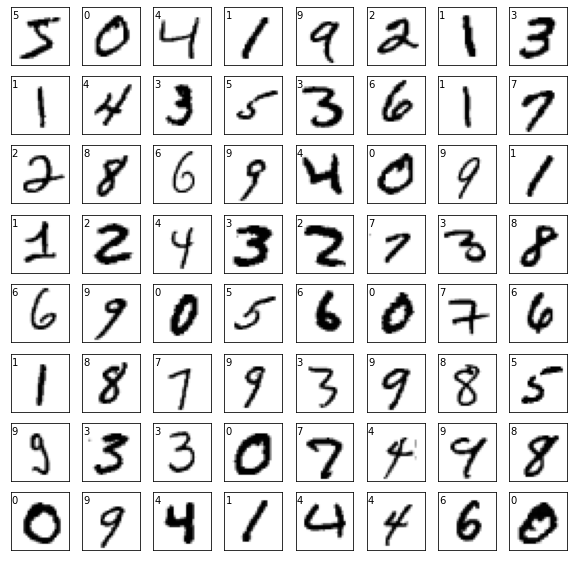

In [7]:
fig = plt.figure(figsize=(10, 10))

for i in range(64):
    digit = X[i]
    digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit_image, cmap=plt.cm.binary)
    ax.text(0, 5, str(y[i]))

## Data Preparation

Split the train and test set

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


Feature scaling using StandardScaler

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Model Training

Train a SVM model

In [10]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

Predict the training set

In [11]:
y_train_predicted = svm_clf.predict(X_train_scaled)

Save the model and predicted training set

In [12]:
filename = 'model/svm_model.sav'
pickle.dump(svm_clf, open(filename, 'wb'))
filename2 = 'model/y_train_predicted.sav'
pickle.dump(y_train_predicted, open(filename2, 'wb'))

Load the saved model

In [13]:
svm_clf = pickle.load(open('model/svm_model.sav', 'rb'))
y_train_predicted = pickle.load(open('model/y_train_predicted.sav', 'rb'))

Shows the confusion matrix for the training set

In [14]:
conf_matrix_train = confusion_matrix(y_train, y_train_predicted)
print(conf_matrix_train)

[[5896    2    0    1    1    3   10    1    8    1]
 [   1 6690   16    7    5    0    1    8    5    9]
 [   8    6 5898    4    9    1    1   14   14    3]
 [   0    7   17 6011    3   25    0   20   36   12]
 [   2   10    6    0 5763    0    7    4    2   48]
 [   6    3    5   32    6 5343   16    1    7    2]
 [  13    5    1    0    5   12 5877    0    5    0]
 [   1   21   17    3   17    0    0 6175    1   30]
 [   5   26    7   22    7   15    7    7 5749    6]
 [   6    8    2   29   44    5    1   46   12 5796]]


Plot the confusion matrix for the training set

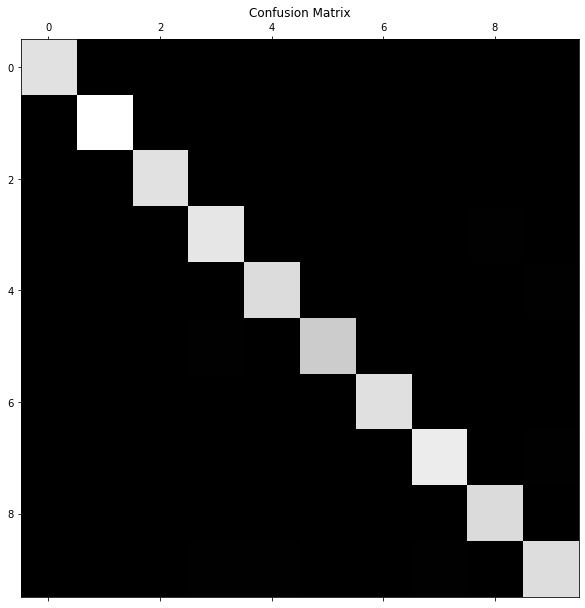

In [15]:
plt.figure(figsize=(10, 10))
plt.matshow(conf_matrix_train, cmap=plt.cm.gray, fignum=1, aspect='auto')
plt.title("Confusion Matrix")
plt.show()

Display the classification report for the training set

In [16]:
print((classification_report(y_train, y_train_predicted)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.98      0.98      0.98      6131
           4       0.98      0.99      0.98      5842
           5       0.99      0.99      0.99      5421
           6       0.99      0.99      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.98      0.98      0.98      5851
           9       0.98      0.97      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [17]:
cross_val = cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

In [18]:
filename3 = 'model/cv_predicted_sav.sav'
pickle.dump(cross_val, open(filename3, 'wb'))

In [19]:
cross_val = pickle.load(open('model/cv_predicted_sav.sav', 'rb'))

In [20]:
print(f"3-fold-cross-validation \nscore: {cross_val}\nmean: {np.mean(cross_val)}")

3-fold-cross-validation 
score: [0.9596 0.9602 0.961 ]
mean: 0.9602666666666666


In [21]:
test_predicted = svm_clf.predict(X_test_scaled)

In [22]:
filename4 = 'model/y_test_predicted.sav'
pickle.dump(test_predicted, open(filename4, 'wb'))

In [23]:
y_test_predicted = pickle.load(open('model/y_test_predicted.sav', 'rb'))

In [24]:
conf_matrix_test = confusion_matrix(y_test, y_test_predicted)
print(conf_matrix_test)

[[ 967    0    2    1    0    3    3    2    2    0]
 [   0 1125    5    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    3  980    1    7    0   12    7    0]
 [   0    0   13    0  945    2    3    7    2   10]
 [   2    0    2   11    1  857    6    5    6    2]
 [   6    2    0    0    4    8  927    6    5    0]
 [   1    6   13    3    3    0    0  989    0   13]
 [   3    0    6    5    6   10    3   12  926    3]
 [   4    5    6   11   13    2    0   21    3  944]]


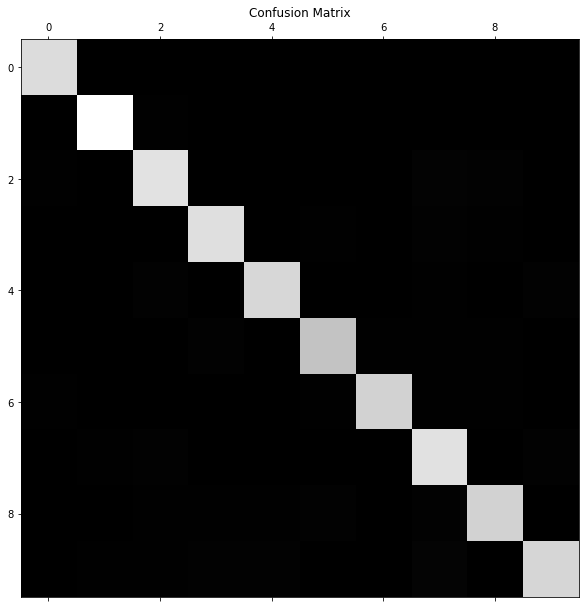

In [25]:
plt.figure(figsize=(10, 10))
plt.matshow(conf_matrix_test, cmap=plt.cm.gray, fignum=1, aspect='auto')
plt.title("Confusion Matrix")
plt.show()

In [26]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



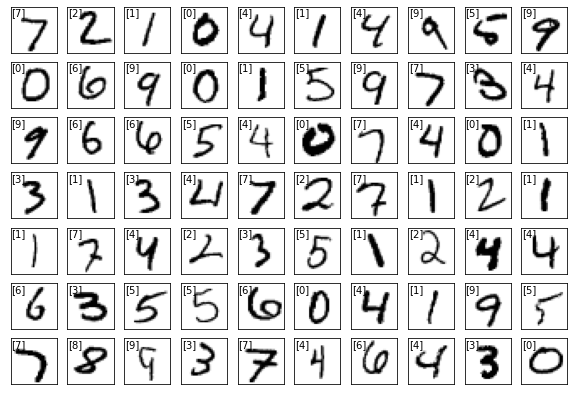

In [27]:
fig = plt.figure(figsize=(10, 10))

for i in range(70):
    digit = X_test[i]
    digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digit_image, cmap=plt.cm.binary)
    ax.text(0, 5, str(svm_clf.predict([X_test_scaled[i]])))

## Conclusion

The handwritten digits classification model that has been built using 70,000 images samples has achieved good accuracy, 99% in the training set and 96% using 3-fold-cross validation. The model is also predict the testing set well and managed to obtain an accuracy of 97%.